# Exploratory Data Analysis (EDA)

In [3]:
import pandas as pd
import imageio
import cv2
from glob import glob
from tqdm import tqdm
from matplotlib import pyplot as plt
from matplotlib import animation as ani
df = pd.read_csv('./data/train_rles.csv', low_memory=False)
# Check what is RLE (according to the main page, it is run length encoded mask)
df

,id,rle
0,kidney_1_dense_0000,1 0
1,kidney_1_dense_0001,1 0
2,kidney_1_dense_0002,1 0
3,kidney_1_dense_0003,1 0
4,kidney_1_dense_0004,1 0
...,...,...
7424,kidney_3_sparse_1030,1 0
7425,kidney_3_sparse_1031,1 0
7426,kidney_3_sparse_1032,1 0
7427,kidney_3_sparse_1033,1 0


## Checking Images

In [4]:

# List the information in data/train

mainFolder = './data/'
# Get all the files from './data/train/'
folderList = sorted(glob(mainFolder + 'train/*'))
# Get all the files inside the first folder
kidneyInfo = glob(folderList[0] + '/*')

# We have in the first folder from kidneyInfo, the images, and in the second folder, the masks,
# we will get the images by:
kidneyImages = sorted(glob(kidneyInfo[0] + '/*'))
maskImages = sorted(glob(kidneyInfo[1] + '/*'))

# Create a GIF 
images = []
for filename in tqdm(kidneyImages):
    images.append(cv2.resize(cv2.imread(filename, cv2.IMREAD_GRAYSCALE), (0,0), fx=0.4, fy=0.4))
imageio.mimsave('./kidney_no_mask.gif', images, format = 'GIF-PIL')

100%|██████████| 2279/2279 [00:03<00:00, 571.54it/s]


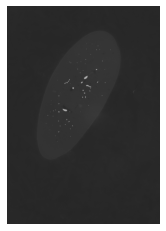

In [130]:
# Put the mask on top of the image
img = cv2.imread(kidneyImages[200])
mask = cv2.imread(maskImages[200])
# Put the mask to have 3 channels
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
mask = cv2.merge((mask, mask, mask))
# Add the mask to the image
masked_img = cv2.addWeighted(img, 0.5, mask, 0.5, 0)

# Plot the image
plt.imshow(masked_img)
plt.axis('off')
plt.show(
)